In [1]:
import pandas as pd

data= pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [2]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [3]:
data.shape

(614, 13)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Categorical Variables

In [5]:
data['Loan_ID'].nunique()

614

<Axes: xlabel='Loan_Status'>

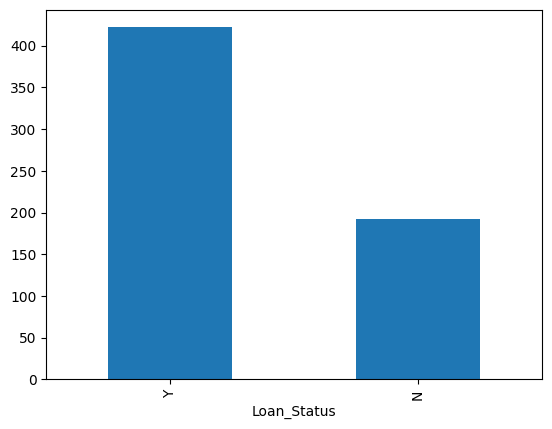

In [6]:
data['Loan_Status'].value_counts().plot(kind='bar')

In [7]:
data['Loan_Status'].value_counts(dropna =False, normalize=True).map('{:.2%}'.format)

Loan_Status
Y    68.73%
N    31.27%
Name: proportion, dtype: object

In [8]:
Categorical_features = data.select_dtypes(include=['object']).columns.to_list()

In [9]:
print(Categorical_features)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [10]:
data['Loan_Amount_Term'].dropna().unique()
data['Credit_History'].dropna().unique()

array([1., 0.])

In [11]:
Categorical_features.remove('Loan_ID')
Categorical_features= Categorical_features + ['Loan_amount_Term', 'Credit_History']

In [12]:
print(Categorical_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Loan_amount_Term', 'Credit_History']


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


KeyError: 'Loan_amount_Term'

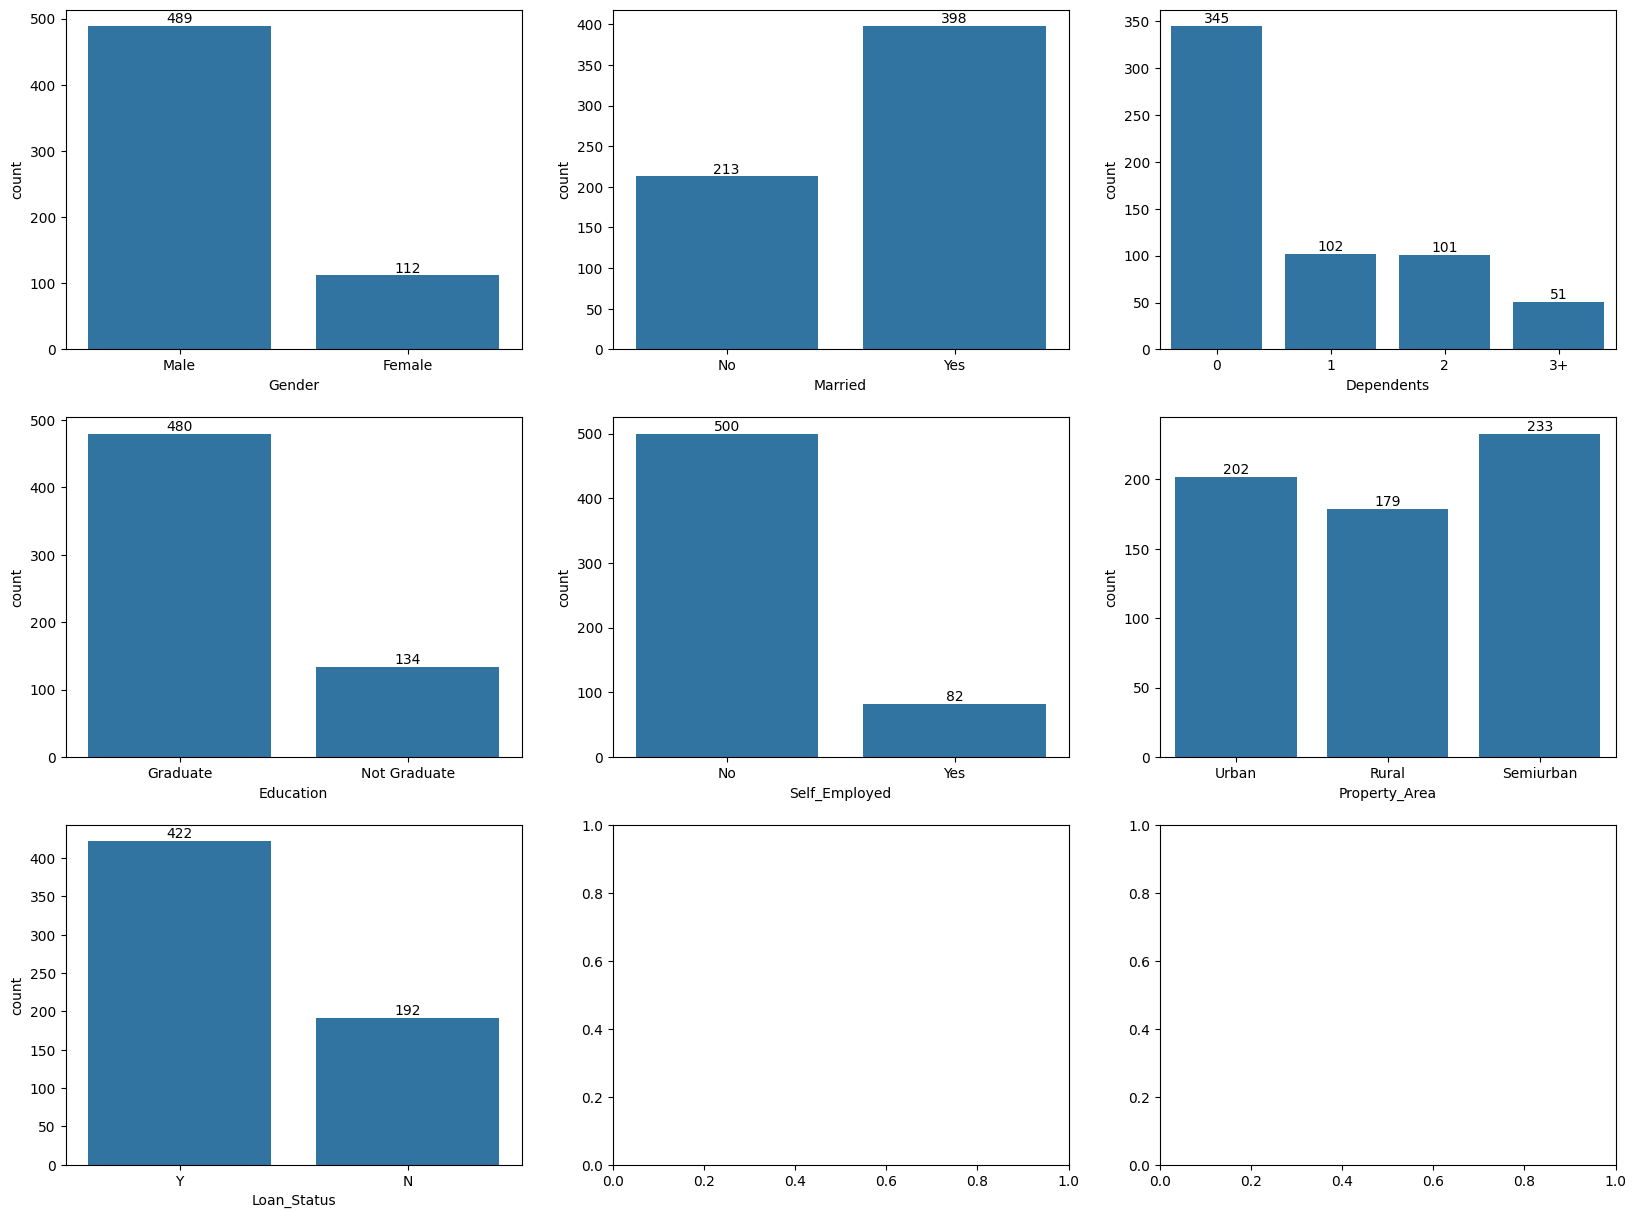

In [23]:
fig, axes= plt.subplots(nrows=3 ,ncols=3, figsize=(20,15))

for col, subplot in zip(Categorical_features, axes.flatten()):
    sns.countplot(x= data[col] , ax= subplot).bar_label(subplot.containers[0])

plt.show()

AttributeError: 'list' object has no attribute 'containers'

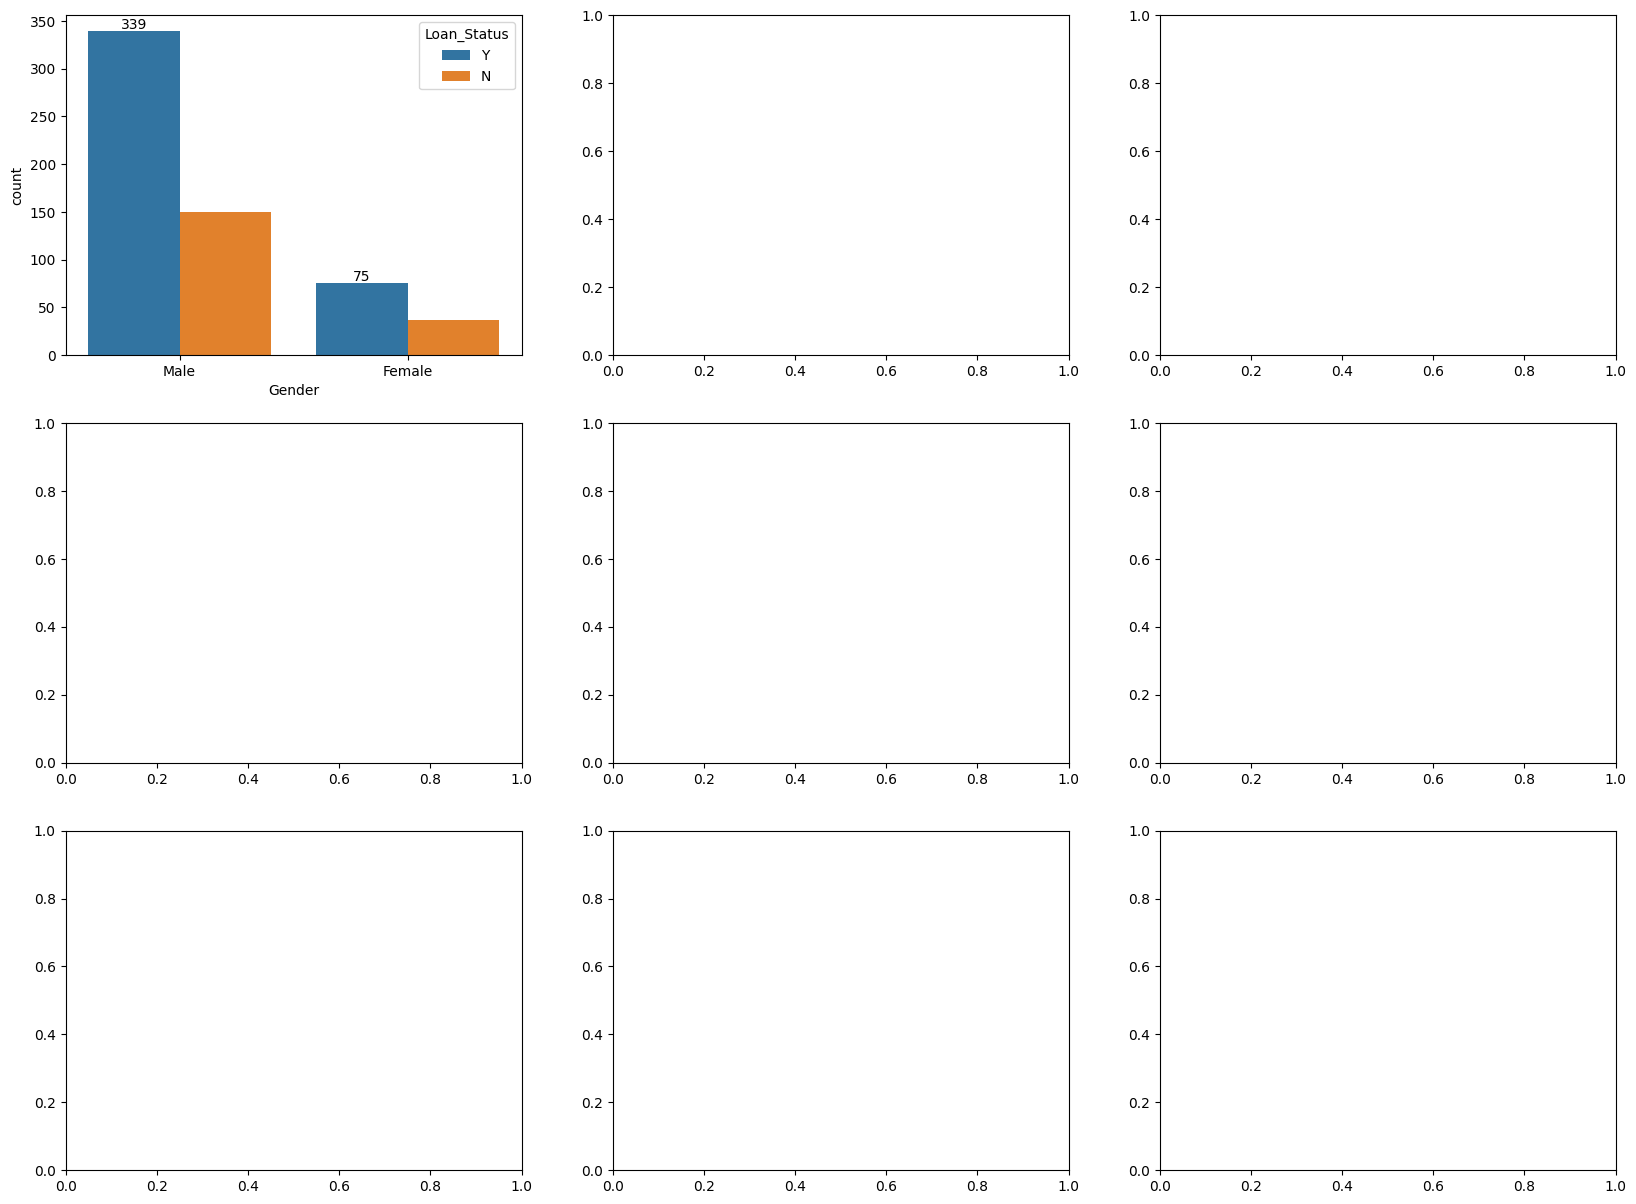

In [29]:
fig, axes= plt.subplots(nrows=3 ,ncols=3, figsize=(20,15))

for col, subplot in zip(Categorical_features, axes.flatten()):
    plot = sns.countplot(x= data[col] ,hue = data['Loan_Status'], ax= subplot).bar_label(subplot.containers[0])
    for container in plot.containers:
        plot.bar_label(container)
plt.show()

### Numerical Variables

In [31]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
data[numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


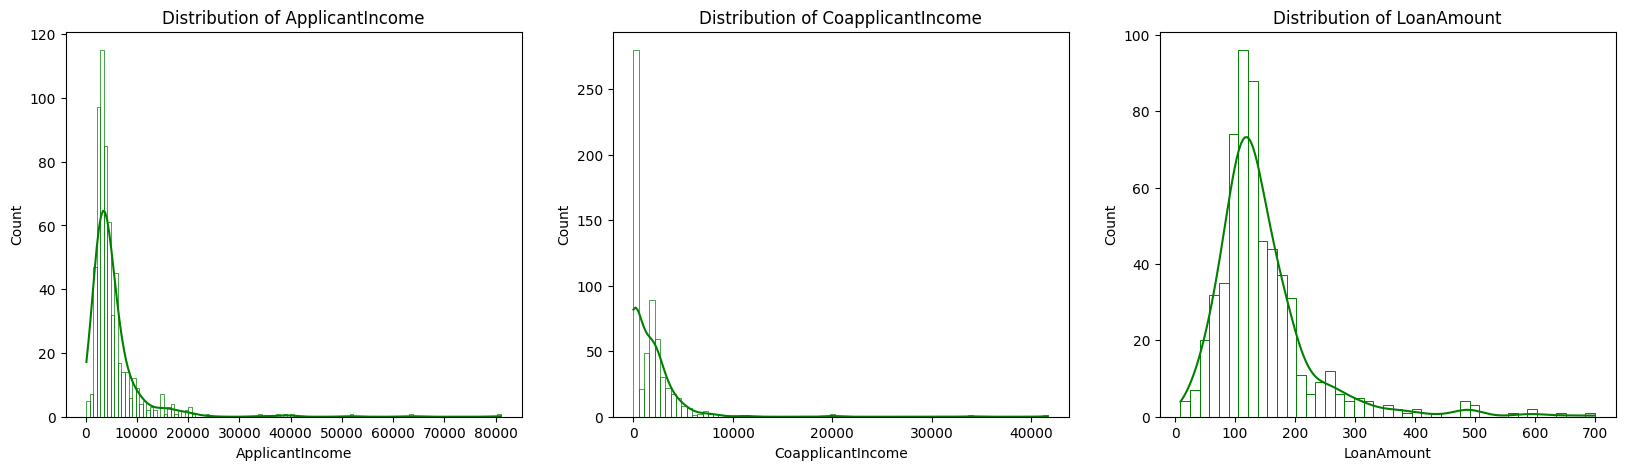

In [45]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for index, col in enumerate(numerical_features):
    sns.histplot(data = data, x = col, kde = True, color = 'green', ax=axes[index], fill = False).set(title = f'Distribution of {col}')
plt.show()

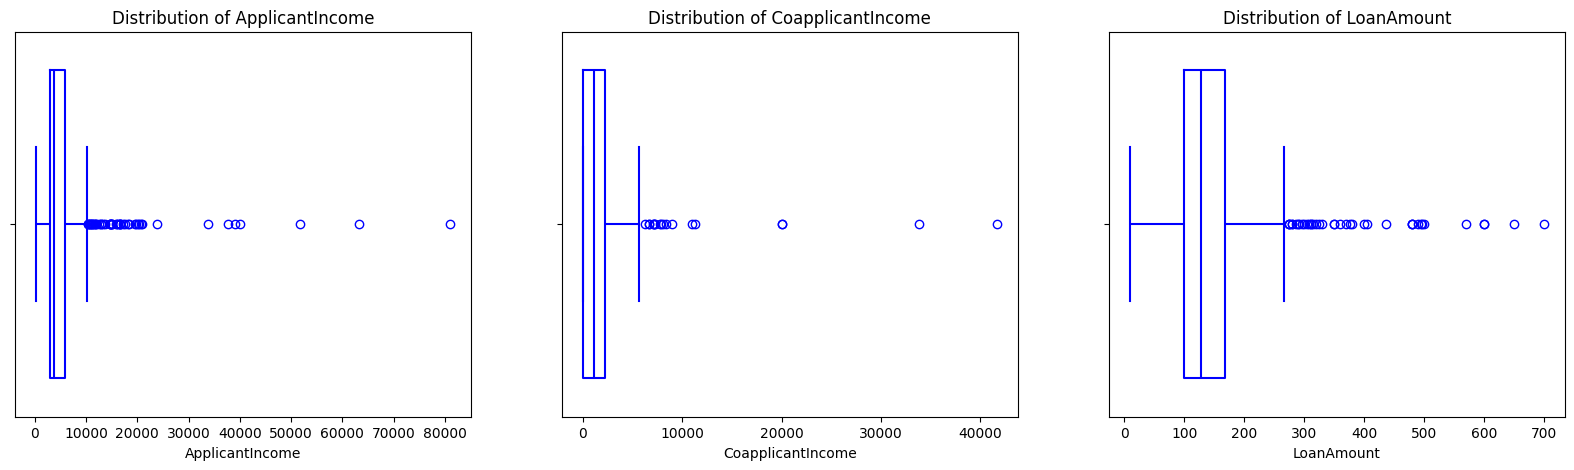

In [46]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for index, col in enumerate(numerical_features):
    sns.boxplot(data = data, x = col,color = 'blue', ax=axes[index], fill = False).set(title = f'Distribution of {col}')
plt.show()

In [48]:
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [49]:
data[numerical_features].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


<Axes: >

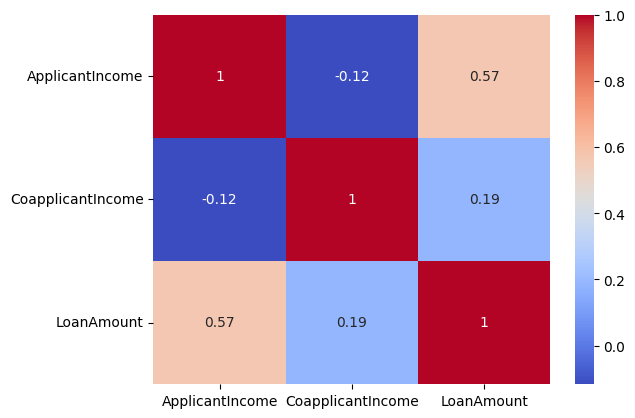

In [50]:
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')

### Bivariate Analysis

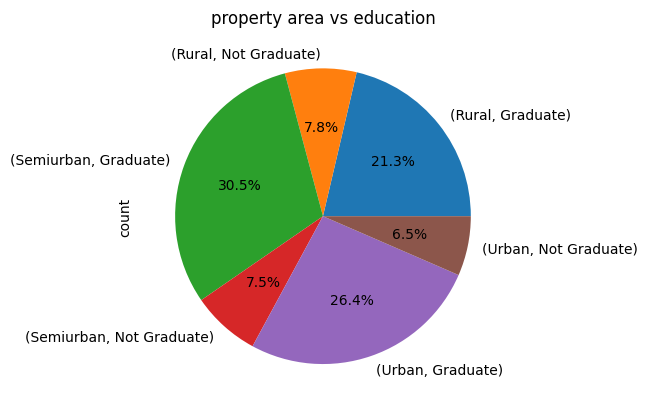

In [52]:
data.groupby('Property_Area').Education.value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('property area vs education')
plt.show()

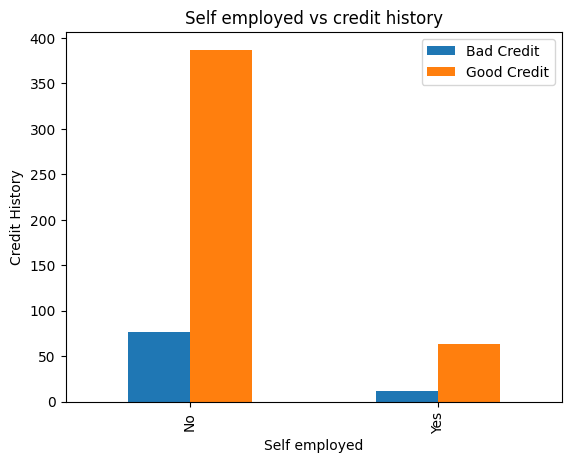

In [54]:
pd.crosstab(data['Self_Employed'], data['Credit_History']).plot.bar()
plt.title('Self employed vs credit history')
plt.xlabel('Self employed')
plt.ylabel('Credit History')
plt.legend(['Bad Credit','Good Credit'])
plt.show()


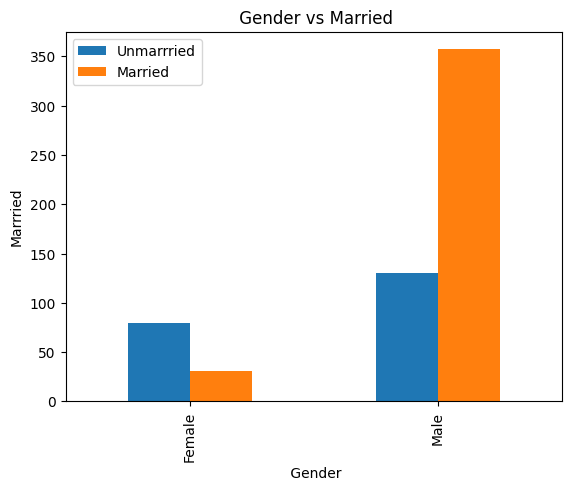

In [56]:
pd.crosstab(data['Gender'], data['Married']).plot.bar()
plt.title(' Gender vs Married')
plt.xlabel(' Gender')
plt.ylabel('Marrried')
plt.legend(['Unmarrried','Married'])
plt.show()


In [58]:
data.groupby('Education')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,465.0,154.060215,92.883366,9.0,103.0,132.0,176.0,700.0
Not Graduate,127.0,118.409449,39.773636,25.0,96.5,115.0,133.0,279.0


<function matplotlib.pyplot.show(close=None, block=None)>

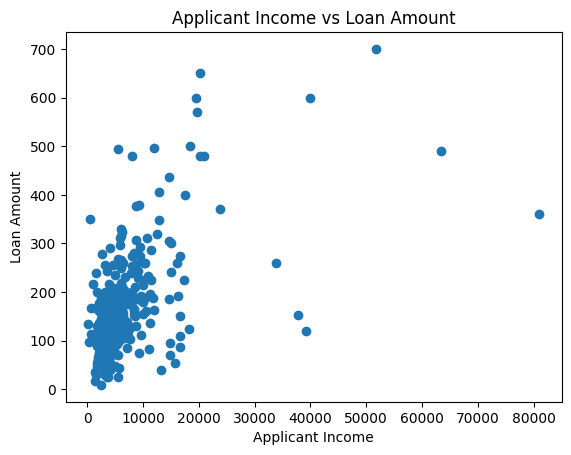

In [59]:
plt.scatter(data['ApplicantIncome'], data['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

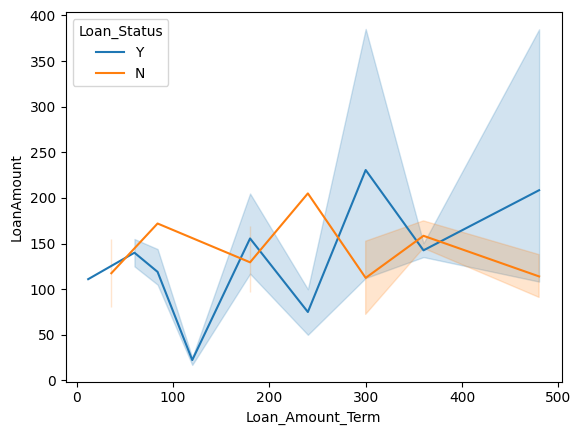

In [61]:
sns.lineplot(x= data['Loan_Amount_Term'], y= data['LoanAmount'], hue=data['Loan_Status'])